In [2]:
from numpy import mean
from numpy import cov
from numpy.linalg import eig
from numpy import array
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import math
import operator
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

('x_train shape:', (60000, 28, 28), 'y_train shape:', (60000,))


In [5]:
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

('x_test shape:', (10000, 28, 28), 'y_test shape:', (10000,))


In [6]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [7]:
x_train_flat = x_train.flatten().reshape(60000, 784)
x_test_flat = x_test.flatten().reshape(10000, 784)
scaler = StandardScaler()
scaler.fit(x_train_flat)
x_train_flat = scaler.transform(x_train_flat)
x_test_flat = scaler.transform(x_test_flat)

In [8]:
# PCA with in-built library
# define a matrix
A = x_train_flat
B = x_test_flat
print(A)
# create the PCA instance
pca = PCA(0.98)
# fit on data
pca.fit(A)
# access values and vectors
print(pca.components_)
print(pca.explained_variance_)
# transform data
C = pca.transform(A)
D = pca.transform(B)
print(C)
print(D)
x_train_final = C
x_test_final = D

[[-0.00864401 -0.02322872 -0.03920663 ..., -0.15683427 -0.08967583
  -0.03415714]
 [-0.00864401 -0.02322872 -0.03920663 ..., -0.15683427 -0.08967583
  -0.03415714]
 [-0.00864401 -0.02322872 -0.03920663 ..., -0.15683427 -0.08967583
  -0.03415714]
 ..., 
 [-0.00864401 -0.02322872 -0.03920663 ..., -0.15683427 -0.08967583
  -0.03415714]
 [-0.00864401 -0.02322872 -0.03920663 ..., -0.15683427 -0.08967583
  -0.03415714]
 [-0.00864401 -0.02322872 -0.03920663 ..., -0.15683427 -0.08967583
  -0.03415714]]
[[  1.78232338e-04   1.02320313e-03   2.18832493e-03 ...,   6.32792432e-03
    1.63296808e-03   7.79547321e-04]
 [ -1.04621568e-05   1.60528126e-03   1.39608979e-03 ...,   1.39374426e-02
    9.55539942e-03   4.30302834e-03]
 [  3.33676348e-04   9.04254615e-04   2.78005004e-03 ...,   9.45950300e-03
   -1.29428110e-03  -9.09442955e-04]
 ..., 
 [  2.73798662e-03  -1.97118800e-03  -1.00557983e-03 ...,   4.29715887e-02
   -1.30891390e-02   8.10030941e-03]
 [ -2.82589288e-04   3.45363235e-03  -8.70425

[[ -8.00979614e-01   2.08666229e+01  -1.29454203e+01 ...,  -3.79480243e-01
    7.09452510e-01  -4.05548453e-01]
 [  1.70740089e+01  -4.96962452e+00  -2.07752705e+00 ...,  -3.12923193e-01
   -1.55033693e-01   2.46470645e-01]
 [ -9.60196877e+00  -1.22959366e+01   1.08263969e+00 ...,   2.78304890e-02
    8.84708911e-02   9.43705291e-02]
 ..., 
 [  9.37738419e+00  -1.31062469e+01  -8.83833218e+00 ...,   1.79755256e-01
   -4.78208601e-01  -7.53951259e-03]
 [ -9.64590836e+00  -7.09520817e+00   6.94547415e+00 ...,  -6.54089525e-02
    3.46744001e-01  -1.68325216e-01]
 [ -2.13172398e+01  -1.74086833e+00   5.47631407e+00 ...,   4.93285060e-01
    7.41532147e-01  -2.28316754e-01]]
[[ -1.67076759e+01   7.35965443e+00  -2.13990140e+00 ...,   5.80129027e-03
   -2.94607699e-01   2.44143635e-01]
 [  2.23006058e+01   9.56057549e+00   1.06565828e+01 ...,  -1.44068897e-02
    6.43315911e-02   4.92822707e-01]
 [  3.87145877e+00  -1.67812042e+01  -8.41484070e+00 ...,  -8.75075161e-02
   -1.98165685e-01  -

In [9]:
print(x_train_final.shape)
print(x_test_final.shape)

(60000, 420)
(10000, 420)


In [10]:
pca.n_components_

420

In [11]:
model = GaussianNB()
model.fit(x_train_final, y_train)
predicted = model.predict(x_test_final)
print(predicted)
print(y_test)

[7 8 1 ..., 4 1 7]
[9 2 1 ..., 8 1 5]


In [12]:
count = 0
for i in range(10000):
    if predicted[i] == y_test[i]:
        count = count + 1
print(count)

5475


In [13]:
kmeans = KMeans(n_clusters = 10, random_state = 0).fit(x_train_final)
print("clusters")
store_array = np.zeros((10, 10))
for i in range(60000):
    store_array[kmeans.labels_[i]][y_train[i]] = store_array[kmeans.labels_[i]][y_train[i]] + 1

clusters


In [14]:
for i in range(10):
    print(store_array[i])
    index, value = max(enumerate(store_array[i]), key=operator.itemgetter(1))
    print(index, value)

[  1.19000000e+02   5.70000000e+01   3.52600000e+03   4.00000000e+01
   3.52100000e+03   0.00000000e+00   1.87500000e+03   0.00000000e+00
   1.34000000e+02   3.00000000e+00]
(2, 3526.0)
[  1.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   2.50000000e+02   2.00000000e+00   1.60000000e+01
   2.50000000e+01   2.05700000e+03]
(9, 2057.0)
[  1.94000000e+02   5.41900000e+03   9.00000000e+00   3.21300000e+03
   1.83000000e+02   2.00000000e+00   5.80000000e+01   0.00000000e+00
   1.90000000e+01   4.00000000e+00]
(1, 5419.0)
[  0.00000000e+00   0.00000000e+00   1.00000000e+00   1.00000000e+00
   0.00000000e+00   4.15000000e+02   2.00000000e+00   6.33000000e+02
   1.38000000e+02   3.46600000e+03]
(9, 3466.0)
[ 1672.   154.  1746.   651.  1077.    35.  2092.     0.   521.    52.]
(6, 2092.0)
[  3.42000000e+03   2.15000000e+02   1.31000000e+02   1.59900000e+03
   9.11000000e+02   1.00000000e+00   1.09500000e+03   0.00000000e+00
   4.20000000e+01   6.00000000e+00

(1, '/n', array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))
8451
(2, '/n', array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))
8472
(3, '/n', array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))
8529
(4, '/n', array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))
8575


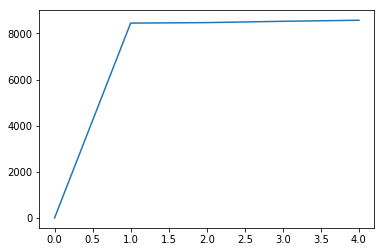

In [26]:
#K Nearest Neighbors
from __future__ import division
store_x = range(1, 5)
store_y = [0]*5
for k in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_final, y_train)
    prediction_list = knn.predict(x_test_final)
    print(k, '/n', prediction_list)
    count = 0
    for i in range(len(prediction_list)):
        if y_test[i] == prediction_list[i]:
            count += 1
    print(count)
    store_y[k] = count
plt.plot(store_x, store_y)
plt.show()


In [16]:
count = 0
for i in range(len(prediction_list)):
    if y_test[i] == prediction_list[i]:
        count += 1
print(count)

8533


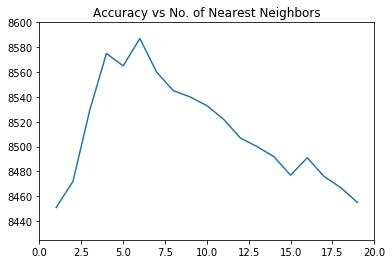

In [31]:
store_x = range(1, 20)
store_y = [8451, 8472, 8529, 8575, 8565, 8587, 8560, 8545, 8540, 8533, 8522, 8507, 8500, 8492, 8477, 8491, 8476, 8467, 8455]
plt.plot(store_x, store_y)
plt.axis([0, 20, 8425, 8600])
plt.title("Accuracy vs No. of Nearest Neighbors")
plt.show()